In [ ]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

c:\Users\VitorRodrigues\Desktop\ALPR-project\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\VitorRodrigues\Desktop\ALPR-project\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\VitorRodrigues\Desktop\ALPR-project\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_han

In [20]:
img_width, img_height = 75, 100
channels = 3  # RGB
num_classes = 35  # 10 dígitos + 25 letras

def load_images(folder_path, label, target_size=(img_width, img_height)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png')):
            try:
                img = Image.open(os.path.join(folder_path, filename))
                # Converte para RGB para garantir 3 canais
                img = img.convert('RGB').resize(target_size)
                img_array = np.array(img) / 255.0
                
                # Verifica se a imagem tem o shape correto
                if img_array.shape == (img_height, img_width, channels):
                    images.append(img_array)
                    labels.append(label)
                else:
                    print(f"Imagem com shape inválido: {img_array.shape} - {filename}")
            except Exception as e:
                print(f"Erro ao processar {filename}: {str(e)}")
    
    return np.array(images), np.array(labels)

# Lista de letras
letras = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
          'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Carrega dados - TREINO
X_train, y_train = load_images("C:/Users/VitorRodrigues/Desktop/ALPR-project/train/0", 0)

# Carrega dados - VALIDAÇÃO
X_test, y_test = load_images("C:/Users/VitorRodrigues/Desktop/ALPR-project/val/0", 0)

# Carrega dígitos 1-9
for i in range(1, 10):
    # Treino
    X_tr, y_tr = load_images(f"C:/Users/VitorRodrigues/Desktop/ALPR-project/train/{i}", i)
    X_train = np.concatenate((X_train, X_tr))
    y_train = np.concatenate((y_train, y_tr))
    
    # Validação
    X_te, y_te = load_images(f"C:/Users/VitorRodrigues/Desktop/ALPR-project/val/{i}", i)
    X_test = np.concatenate((X_test, X_te))
    y_test = np.concatenate((y_test, y_te))

# Carrega letras
for letra in letras:
    label = 10 + letras.index(letra)
    # Treino
    X_tr, y_tr = load_images(f"C:/Users/VitorRodrigues/Desktop/ALPR-project/train/{letra}", label)
    X_train = np.concatenate((X_train, X_tr))
    y_train = np.concatenate((y_train, y_tr))
    
    # Validação
    X_te, y_te = load_images(f"C:/Users/VitorRodrigues/Desktop/ALPR-project/val/{letra}", label)
    X_test = np.concatenate((X_test, X_te))
    y_test = np.concatenate((y_test, y_te))

# Verificação dos shapes
print("\nVerificação final:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# One-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print("\nApós one-hot encoding:")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Verificação final:
X_train shape: (24850, 100, 75, 3)
y_train shape: (24850,)
X_test shape: (10650, 100, 75, 3)
y_test shape: (10650,)

Após one-hot encoding:
y_train shape: (24850, 35)
y_test shape: (10650, 35)


In [22]:
model = Sequential([
    # Primeira camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)),
    MaxPooling2D((2, 2)),
    
    # Segunda camada convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Terceira camada convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Achata a saída para camadas densas
    Flatten(),
    
    # Camadas densas
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularização para evitar overfitting
    
    # Camada de saída
    Dense(num_classes, activation='softmax')
])

# Compila o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostra o resumo do modelo
model.summary()

c:\Users\VitorRodrigues\Desktop\ALPR-project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 73, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,147,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,244,771 (4.75 MB)

 Trainable params: 1,244,771 (4.75 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.7329 - loss: 0.9143 - val_accuracy: 0.9777 - val_loss: 0.0819
Epoch 2/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.9293 - loss: 0.2178 - val_accuracy: 0.9926 - val_loss: 0.0343
Epoch 3/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.9546 - loss: 0.1428 - val_accuracy: 0.9957 - val_loss: 0.0196
Epoch 4/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.9630 - loss: 0.1141 - val_accuracy: 0.9957 - val_loss: 0.0185
Epoch 5/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9731 - loss: 0.0866 - val_accuracy: 0.9977 - val_loss: 0.0102
Epoch 6/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.9769 - loss: 0.0698 - val_accuracy: 0.9972 - val_loss: 0.0116
Epoch 7/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9795 - loss: 0.0641 - val_accuracy: 0.9978 - val_loss: 0.0082
Epoch 8/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.9825 - loss: 0.052

333/333 - 9s - 26ms/step - accuracy: 0.9982 - loss: 0.0082

Acurácia no teste: 0.9982


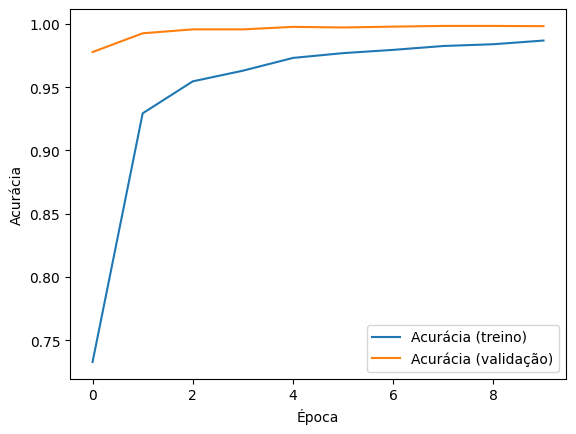

In [ ]:
# Avalia no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nAcurácia no teste: {test_acc:.4f}')

plt.plot(history.history['accuracy'], label='Acurácia (treino)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()